<a href="https://colab.research.google.com/github/priyal6/Featureengineering/blob/main/missingdata_with_mean_median_imputationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [7]:
df = pd.read_csv('titanic_toy.csv')

In [8]:
df.head()

,Age,Fare,Family,Survived
0,22.0,7.2500,1,0
1,38.0,71.2833,1,1
2,26.0,7.9250,0,1
3,35.0,53.1000,1,1
4,35.0,8.0500,0,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       714 non-null    float64
 1   Fare      846 non-null    float64
 2   Family    891 non-null    int64  
 3   Survived  891 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 28.0 KB


In [10]:
df.isnull().mean()

Age         0.198653
Fare        0.050505
Family      0.000000
Survived    0.000000
dtype: float64

In [11]:
X = df.drop(columns=['Survived'])
y = df['Survived']

In [12]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [13]:
X_train.shape,X_test.shape

((712, 3), (179, 3))

In [14]:
X_train.isnull().mean()

Age       0.207865
Fare      0.050562
Family    0.000000
dtype: float64

In [15]:
mean_age = X_train['Age'].mean()
median_age = X_train['Age'].median()

mean_fare = X_train['Fare'].mean()
median_fare = X_train['Fare'].median()

In [16]:
X_train['Age_median'] = X_train['Age'].fillna(median_age)
X_train['Age_mean'] = X_train['Age'].fillna(mean_age)

X_train['Fare_median'] = X_train['Fare'].fillna(median_age)
X_train['Fare_mean'] = X_train['Fare'].fillna(mean_age)

In [17]:
X_train.sample(5)

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
90,29.0,8.0500,0,29.0,29.0,8.0500,8.0500
532,17.0,7.2292,2,17.0,17.0,7.2292,7.2292
296,23.5,7.2292,0,23.5,23.5,7.2292,7.2292
687,19.0,10.1708,0,19.0,19.0,10.1708,10.1708
147,9.0,34.3750,4,9.0,9.0,34.3750,34.3750


In [18]:
print('Original Age variable variance: ', X_train['Age'].var())
print('Age Variance after median imputation: ', X_train['Age_median'].var())
print('Age Variance after mean imputation: ', X_train['Age_mean'].var())

print('Original Fare variable variance: ', X_train['Fare'].var())
print('Fare Variance after median imputation: ', X_train['Fare_median'].var())
print('Fare Variance after mean imputation: ', X_train['Fare_mean'].var())

Original Age variable variance:  204.34951339046142
Age Variance after median imputation:  161.98956633460548
Age Variance after mean imputation:  161.81262452718676
Original Fare variable variance:  2448.1979137063163
Fare Variance after median imputation:  2324.957613614932
Fare Variance after mean imputation:  2324.623996772902


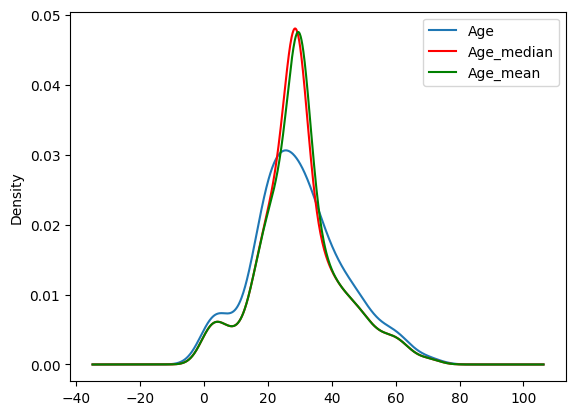

In [19]:
fig = plt.figure()
ax= fig.add_subplot()


X_train['Age'].plot(kind='kde',ax=ax)

X_train['Age_median'].plot(kind='kde',ax=ax,color='red')

X_train['Age_mean'].plot(kind='kde',ax=ax,color='green')

lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

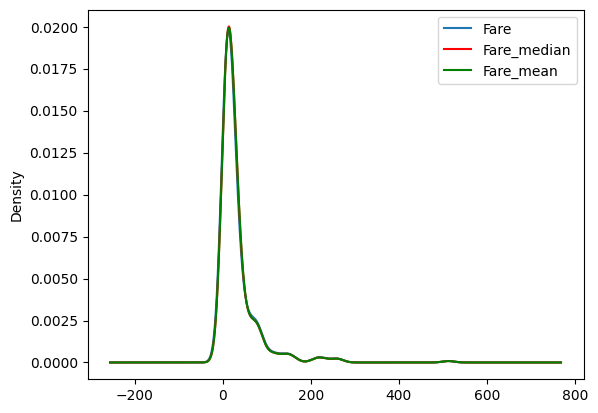

In [20]:
fig = plt.figure()
ax = fig.add_subplot(111)


X_train['Fare'].plot(kind='kde', ax=ax)


X_train['Fare_median'].plot(kind='kde', ax=ax, color='red')


X_train['Fare_mean'].plot(kind='kde', ax=ax, color='green')


lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [21]:
X_train.cov()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,204.349513,70.719262,-6.498901,204.349513,204.349513,66.280487,66.383530
Fare,70.719262,2448.197914,17.258917,57.957599,55.603719,2448.197914,2448.197914
Family,-6.498901,17.258917,2.735252,-5.112563,-5.146106,16.404484,16.399278
Age_median,204.349513,57.957599,-5.112563,161.989566,161.812625,54.710043,54.793876
Age_mean,204.349513,55.603719,-5.146106,161.812625,161.812625,52.483705,52.565299
Fare_median,66.280487,2448.197914,16.404484,54.710043,52.483705,2324.957614,2324.765012
Fare_mean,66.383530,2448.197914,16.399278,54.793876,52.565299,2324.765012,2324.623997


In [22]:
X_train.corr()

,Age,Fare,Family,Age_median,Age_mean,Fare_median,Fare_mean
Age,1.000000,0.092644,-0.299113,1.000000,1.000000,0.089604,0.089754
Fare,0.092644,1.000000,0.208268,0.091757,0.088069,1.000000,1.000000
Family,-0.299113,0.208268,1.000000,-0.242883,-0.244610,0.205710,0.205660
Age_median,1.000000,0.091757,-0.242883,1.000000,0.999454,0.089149,0.089292
Age_mean,1.000000,0.088069,-0.244610,0.999454,1.000000,0.085568,0.085707
Fare_median,0.089604,1.000000,0.205710,0.089149,0.085568,1.000000,0.999989
Fare_mean,0.089754,1.000000,0.205660,0.089292,0.085707,0.999989,1.000000


<Axes: >

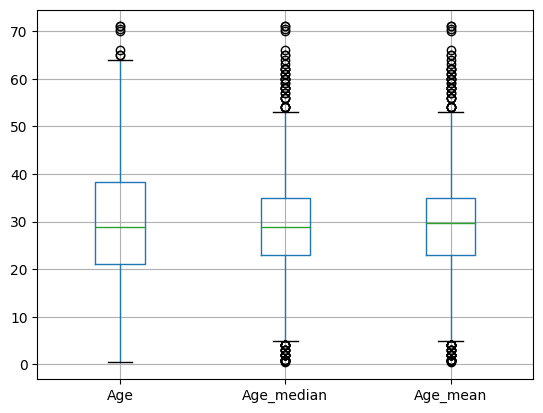

In [23]:
X_train[['Age','Age_median','Age_mean']].boxplot()

<Axes: >

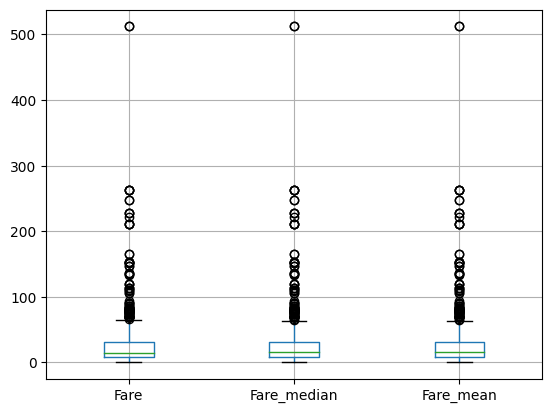

In [24]:
X_train[['Fare', 'Fare_median', 'Fare_mean']].boxplot()

In [25]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [26]:
imputer1 = SimpleImputer(strategy='median')
imputer2 = SimpleImputer(strategy='mean')

In [27]:
trf = ColumnTransformer([
    ('imputer1',imputer1,['Age']), #median
    ('imputer2',imputer2,['Fare']) #mean
],remainder='passthrough')

In [28]:
trf.fit(X_train)

ColumnTransformer(remainder='passthrough',
                  transformers=[('imputer1', SimpleImputer(strategy='median'),
                                 ['Age']),
                                ('imputer2', SimpleImputer(), ['Fare'])])

In [29]:
trf.named_transformers_['imputer1'].statistics_

array([28.75])

In [30]:
trf.named_transformers_['imputer2'].statistics_

array([32.61759689])

In [31]:
X_train=trf.transform(X_train)
X_test= trf.transform(X_test)

In [32]:
X_train

array([[ 40.    ,  27.7208,   0.    ],
       [  4.    ,  16.7   ,   2.    ],
       [ 47.    ,   9.    ,   0.    ],
       ...,
       [ 71.    ,  49.5042,   0.    ],
       [ 28.75  , 221.7792,   0.    ],
       [ 28.75  ,  25.925 ,   0.    ]])